## Code

### Getting Data from the user: 

Current Dataset: [Student_performance_parameters_final_without_result.xlsx](https://docs.google.com/spreadsheets/d/1Vl-VpRlwDlaAdgnK8f9dqXYAUGUE9jfz/edit?usp=sharing&ouid=108334363958270871098&rtpof=true&sd=true)

In [ ]:
#@title Upload Historical Data:

#@markdown ---

from google.colab import files

uploaded = files.upload()

file_name = list(uploaded.keys())[0]

Saving Student_performance_parameters_final_without_rating.xlsx to Student_performance_parameters_final_without_rating.xlsx


In [ ]:
#@title Select the Semester and Paper(s): { run: "auto" }

#@markdown ### Select Semester:

Semester = 'Sem_6' #@param ["Sem_1", "Sem_2", "Sem_3", "Sem_4", "Sem_5", "Sem_6", "Sem_7", "Sem_8"]
key = Semester

#@markdown ### Select Paper:
Paper_1 = False #@param {type:"boolean"}
Paper_2 = True #@param {type:"boolean"}
Paper_3 = False #@param {type:"boolean"}
Paper_4 = False #@param {type:"boolean"}
Paper_5 = False #@param {type:"boolean"}
Paper_6 = False #@param {type:"boolean"}
Paper_7 = True #@param {type:"boolean"}


#@markdown ### Enter Minimum Rating:

min_rating = 20 #@param {type:"slider", min:0, max:100, step:1}

#@markdown ### Number of Top Recommendations For Calculation:

Number_of_top_recommendations = 3 #@param {type:"slider", min:2, max:7, step:1}


In [ ]:
known_solution = []

if Paper_1:
    known_solution.append('Paper 1')

if Paper_2:
    known_solution.append('Paper 2')

if Paper_3:
    known_solution.append('Paper 3')

if Paper_4:
    known_solution.append('Paper 4')

if Paper_5:
    known_solution.append('Paper 5')

if Paper_6:
    known_solution.append('Paper 6')

if Paper_7:
    known_solution.append('Paper 7')

#### Rating for the subjects already chosen:

In [ ]:
#@title Select Parameters to consider: { run: "auto" }

#@markdown ---

Subject_Content = True #@param {type:"boolean"}
Teacher_Rating = False #@param {type:"boolean"}
Subject_Interest = True #@param {type:"boolean"}
Practical_Knowledge = True #@param {type:"boolean"}
Likely_to_recommend = False #@param {type:"boolean"}


In [ ]:
parameters = [] #matches headers
if Subject_Content:
  parameters.append("subject_content")

if Teacher_Rating:
  parameters.append("teacher_rating")

if Subject_Interest:
  parameters.append("subject_interest")

if Practical_Knowledge:
  parameters.append("practical_knowledge")

if Likely_to_recommend:
  parameters.append("likely_to_recommend")

In [ ]:
#@title Select Rating for the chosen subject (out of 20): { run: "auto" }

dict_append_list = []

for paper in known_solution:
  print("Subject:", paper)
  dict_append = {'Student_ID': 'NEW_VALUE', 'Paper_Name': paper, 'Rating': 0}

  rating = 0
  i = 0
  while (i < len(parameters)):
    try:
      val = int(input("  Enter Rating for " + parameters[i] + ":"))
      rating += val
    
      if val < 0 or val > 20:
        print("Invalid Input: Enter a rating between 1-20")
        i -= 1

      i += 1
    except:
      print("Invalid Input")
  
  dict_append['Rating'] = rating

  dict_append_list.append(dict_append)

Subject: Paper 2
  Enter Rating for subject_content:20
  Enter Rating for subject_interest:15
  Enter Rating for practical_knowledge:10
Subject: Paper 7
  Enter Rating for subject_content:20
  Enter Rating for subject_interest:13
  Enter Rating for practical_knowledge:12


In [ ]:
dict_append_list

[{'Paper_Name': 'Paper 2', 'Rating': 45, 'Student_ID': 'NEW_VALUE'},
 {'Paper_Name': 'Paper 7', 'Rating': 45, 'Student_ID': 'NEW_VALUE'}]

### Importing Libraries


In [ ]:
import numpy as np
import pandas as pd

### Preparing the Data

In [ ]:
### Input and get the semester:
df = pd.read_excel(file_name, sheet_name='Sheet1')

df_dict_sem = {}
for name in df['Semster_Name'].unique():
    df_dict_sem[name] = df[df['Semster_Name'] == name].reset_index(drop=True)

df_sem = df_dict_sem[key]

In [ ]:
df_sem.head()

,Unnamed: 0,Student_ID,Semster_Name,Paper_ID,Paper_Name,subject_content,teacher_rating,subject_interest,practical_knowledge,likely_to_recommend
0,34,SID20131143,Sem_6,SEMI0068923,Paper 1,19,20,19,19,16
1,35,SID20131143,Sem_6,SEMI0067259,Paper 2,13,15,19,18,19
2,36,SID20131143,Sem_6,SEMI0065623,Paper 3,10,9,8,11,8
3,37,SID20131143,Sem_6,SEMI0064181,Paper 4,16,15,17,13,15
4,38,SID20131143,Sem_6,SEMI0064427,Paper 5,13,8,12,6,15


In [ ]:
#Computing Rating for all
df_sem["Rating"] = 0
for parameter in parameters:
  df_sem["Rating"] += df_sem[parameter] 

In [ ]:
df_sem.head()

,Unnamed: 0,Student_ID,Semster_Name,Paper_ID,Paper_Name,subject_content,teacher_rating,subject_interest,practical_knowledge,likely_to_recommend,Rating
0,34,SID20131143,Sem_6,SEMI0068923,Paper 1,19,20,19,19,16,57
1,35,SID20131143,Sem_6,SEMI0067259,Paper 2,13,15,19,18,19,50
2,36,SID20131143,Sem_6,SEMI0065623,Paper 3,10,9,8,11,8,29
3,37,SID20131143,Sem_6,SEMI0064181,Paper 4,16,15,17,13,15,46
4,38,SID20131143,Sem_6,SEMI0064427,Paper 5,13,8,12,6,15,31


In [ ]:
#Applying Rating Threshold
df_sem_min_rating = df_sem[df_sem['Rating'] > min_rating].reset_index(drop=True)
df_sem_min_rating.head()

,Unnamed: 0,Student_ID,Semster_Name,Paper_ID,Paper_Name,subject_content,teacher_rating,subject_interest,practical_knowledge,likely_to_recommend,Rating
0,34,SID20131143,Sem_6,SEMI0068923,Paper 1,19,20,19,19,16,57
1,35,SID20131143,Sem_6,SEMI0067259,Paper 2,13,15,19,18,19,50
2,36,SID20131143,Sem_6,SEMI0065623,Paper 3,10,9,8,11,8,29
3,37,SID20131143,Sem_6,SEMI0064181,Paper 4,16,15,17,13,15,46
4,38,SID20131143,Sem_6,SEMI0064427,Paper 5,13,8,12,6,15,31


In [ ]:
df_sem_min_rating = df_sem_min_rating[['Student_ID', 'Paper_Name', 'Rating']]
df_sem_min_rating.head()

,Student_ID,Paper_Name,Rating
0,SID20131143,Paper 1,57
1,SID20131143,Paper 2,50
2,SID20131143,Paper 3,29
3,SID20131143,Paper 4,46
4,SID20131143,Paper 5,31


### Data Prepocessing

In [ ]:
#Drop rows with missing values
data_raw = df_sem_min_rating.dropna()

In [ ]:
#for dict_append in dict_append_list:
#  data = data.append(dict_append, ignore_index = True)
#data.tail()

In [ ]:
#put names into numerical IDs
data_raw['student_cat_id'] = data_raw['Student_ID'].astype("category").cat.codes + 1 #0's used for padding later
data_raw['paper_cat_id'] = data_raw['Paper_Name'].astype("category").cat.codes + 1 #0's used for padding later
data_raw.head()

,Student_ID,Paper_Name,Rating,student_cat_id,paper_cat_id
0,SID20131143,Paper 1,57,1,1
1,SID20131143,Paper 2,50,1,2
2,SID20131143,Paper 3,29,1,3
3,SID20131143,Paper 4,46,1,4
4,SID20131143,Paper 5,31,1,5


In [ ]:
#Lookup frame to get student id back in readable form later
student_lookup = data_raw[['student_cat_id', 'Student_ID']].drop_duplicates()
student_lookup['student_cat_id'] = student_lookup.student_cat_id.astype(str)
student_lookup.head()

,student_cat_id,Student_ID
0,1,SID20131143
7,2,SID20131151
14,3,SID20131171
20,4,SID20131176
27,5,SID20131177


In [ ]:
#Lookup frame to get paper names back in readable form later
item_lookup = data_raw[['paper_cat_id', 'Paper_Name']].drop_duplicates()
item_lookup['paper_cat_id'] = item_lookup.paper_cat_id.astype(str)
item_lookup.head()

,paper_cat_id,Paper_Name
0,1,Paper 1
1,2,Paper 2
2,3,Paper 3
3,4,Paper 4
4,5,Paper 5


In [ ]:
#Dropping Student_ID and Paper_Name 
data_raw = data_raw.drop(['Student_ID', 'Paper_Name'], axis=1)
data_raw.head()

,Rating,student_cat_id,paper_cat_id
0,57,1,1
1,50,1,2
2,29,1,3
3,46,1,4
4,31,1,5


Instead of Discarding Rating all together, we use them to order the data, highest first

In [ ]:
data =  data_raw.groupby(['student_cat_id']).apply(lambda x: x.sort_values(["Rating"], ascending = False)).reset_index(drop=True)
data.head()

,Rating,student_cat_id,paper_cat_id
0,57,1,1
1,50,1,2
2,46,1,4
3,31,1,5
4,29,1,3


In [ ]:
data = data.drop(['Rating'], axis = 1 )
data.head()

,student_cat_id,paper_cat_id
0,1,1
1,1,2
2,1,4
3,1,5
4,1,3


In [ ]:
data.dtypes

student_cat_id    int16
paper_cat_id       int8
dtype: object

In [ ]:
data['paper_cat_id'] = data['paper_cat_id'].apply(lambda x: [x])
data.head()

,student_cat_id,paper_cat_id
0,1,[1]
1,1,[2]
2,1,[4]
3,1,[5]
4,1,[3]


In [ ]:
data = data.groupby('student_cat_id').agg({'paper_cat_id': 'sum'})
data.head()

,paper_cat_id
student_cat_id,
1,"[1, 2, 4, 5, 3, 6, 7]"
2,"[3, 4, 1, 6, 5, 2, 7]"
3,"[7, 5, 4, 6, 3, 1]"
4,"[6, 7, 4, 5, 1, 3, 2]"
5,"[1, 3, 7, 6, 2, 4, 5]"


In [ ]:
max_seq_len = data.paper_cat_id.apply(len).max()
max_seq_len

7

In [ ]:
data['padded_sequences'] = pad_sequences(data.paper_cat_id, maxlen=max_seq_len, padding='pre', value=0).tolist()
data.head()

,paper_cat_id,padded_sequences
student_cat_id,,
1,"[1, 2, 4, 5, 3, 6, 7]","[1, 2, 4, 5, 3, 6, 7]"
2,"[3, 4, 1, 6, 5, 2, 7]","[3, 4, 1, 6, 5, 2, 7]"
3,"[7, 5, 4, 6, 3, 1]","[0, 7, 5, 4, 6, 3, 1]"
4,"[6, 7, 4, 5, 1, 3, 2]","[6, 7, 4, 5, 1, 3, 2]"
5,"[1, 3, 7, 6, 2, 4, 5]","[1, 3, 7, 6, 2, 4, 5]"


In [ ]:
data['target_sequences'] = data['padded_sequences'].apply(lambda x: x[-1])
data.head()

,paper_cat_id,padded_sequences,target_sequences
student_cat_id,,,
1,"[1, 2, 4, 5, 3, 6, 7]","[1, 2, 4, 5, 3, 6, 7]",7
2,"[3, 4, 1, 6, 5, 2, 7]","[3, 4, 1, 6, 5, 2, 7]",7
3,"[7, 5, 4, 6, 3, 1]","[0, 7, 5, 4, 6, 3, 1]",1
4,"[6, 7, 4, 5, 1, 3, 2]","[6, 7, 4, 5, 1, 3, 2]",2
5,"[1, 3, 7, 6, 2, 4, 5]","[1, 3, 7, 6, 2, 4, 5]",5


In [ ]:
data['padded_sequences'] = data['padded_sequences'].apply(lambda x: x[:-1])
data.head()

,paper_cat_id,padded_sequences,target_sequences
student_cat_id,,,
1,"[1, 2, 4, 5, 3, 6, 7]","[1, 2, 4, 5, 3, 6]",7
2,"[3, 4, 1, 6, 5, 2, 7]","[3, 4, 1, 6, 5, 2]",7
3,"[7, 5, 4, 6, 3, 1]","[0, 7, 5, 4, 6, 3]",1
4,"[6, 7, 4, 5, 1, 3, 2]","[6, 7, 4, 5, 1, 3]",2
5,"[1, 3, 7, 6, 2, 4, 5]","[1, 3, 7, 6, 2, 4]",5


### Extracting Data and Preparing for Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras_preprocessing.sequence import pad_sequences

In [ ]:
X = np.array(data.padded_sequences.tolist())
y = np.array(data.target_sequences.tolist())

In [ ]:
print(X)
print(y)

[[1 2 4 5 3 6]
 [3 4 1 6 5 2]
 [0 7 5 4 6 3]
 ...
 [3 6 4 2 5 7]
 [1 3 2 4 7 6]
 [5 7 6 4 1 2]]
[7 7 1 ... 1 5 3]


In [ ]:
num_classes = int(item_lookup.paper_cat_id.max())+1
num_classes

8

In [ ]:
#One hot encoding for targets
y = to_categorical(y, num_classes = num_classes)
print(y)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Model using Validation Split Method:

#### Defining and Training a Model

In [ ]:
from keras import Sequential
from keras.layers import Embedding, Dropout, LSTM, Dense

In [ ]:
model = Sequential()
model.add(Embedding(num_classes, 5, input_length=max_seq_len - 1))
model.add(Dropout(0.2))
model.add(LSTM(3))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 6, 5)              40        
                                                                 
 dropout (Dropout)           (None, 6, 5)              0         
                                                                 
 lstm (LSTM)                 (None, 3)                 108       
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0         
                                                                 
 dense (Dense)               (None, 8)                 32        
                                                                 
Total params: 180
Trainable params: 180
Non-trainable params: 0
_________________________________________________________________


In [ ]:
h = model.fit(X, y, validation_split=0.2, verbose=1, epochs=500)

Epoch 1/500
96/96 [==============================] - 3s 10ms/step - loss: 2.0610 - acc: 0.1771 - val_loss: 2.0456 - val_acc: 0.1361
Epoch 2/500
96/96 [==============================] - 0s 5ms/step - loss: 2.0074 - acc: 0.2134 - val_loss: 1.9763 - val_acc: 0.2173
Epoch 3/500
96/96 [==============================] - 1s 5ms/step - loss: 1.9057 - acc: 0.2517 - val_loss: 1.8420 - val_acc: 0.2317
Epoch 4/500
96/96 [==============================] - 0s 5ms/step - loss: 1.7950 - acc: 0.2890 - val_loss: 1.7458 - val_acc: 0.3626
Epoch 5/500
96/96 [==============================] - 1s 5ms/step - loss: 1.7335 - acc: 0.3417 - val_loss: 1.6727 - val_acc: 0.3730
Epoch 6/500
96/96 [==============================] - 1s 5ms/step - loss: 1.6875 - acc: 0.3502 - val_loss: 1.6141 - val_acc: 0.3914
Epoch 7/500
96/96 [==============================] - 1s 5ms/step - loss: 1.6518 - acc: 0.3614 - val_loss: 1.5615 - val_acc: 0.4385
Epoch 8/500
96/96 [==============================] - 1s 6ms/step - loss: 1.6216 - 

#### Plotting the results:

In [ ]:
import matplotlib.pyplot as plt

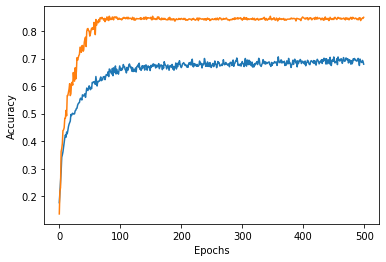

In [ ]:
plt.plot(h.history['acc'], label='Train accuracy')
plt.plot(h.history['val_acc'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

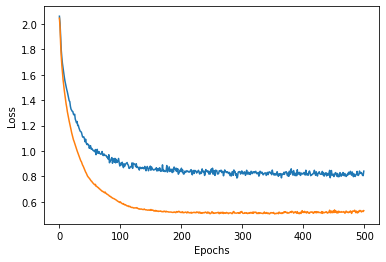

In [ ]:
plt.plot(h.history['loss'], label='Train loss')
plt.plot(h.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Model using Train_test Split Method:

#### Defining and Training a Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
ip_sh = X.shape[1]
ip_sh

6

In [ ]:
model = Sequential([
                    LSTM(128, return_sequences=False, input_shape=(ip_sh,1)),
                    Dense(64, activation='relu'),
                    Dropout(0.4),
                    Dense(32, activation='relu'),
                    Dropout(0.4),
                    Dense(num_classes, activation='softmax'),
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 264       
                                                                 
Total params: 77,160
Trainable params: 77,160
Non-trai

In [ ]:
#Training the Model
history = model.fit(X_train , y_train, epochs=1000, batch_size=128)

Epoch 1/1000
24/24 [==============================] - 3s 20ms/step - loss: 2.0655 - accuracy: 0.1322
Epoch 2/1000
24/24 [==============================] - 0s 20ms/step - loss: 2.0385 - accuracy: 0.1453
Epoch 3/1000
24/24 [==============================] - 0s 20ms/step - loss: 2.0189 - accuracy: 0.1372
Epoch 4/1000
24/24 [==============================] - 0s 20ms/step - loss: 1.9969 - accuracy: 0.1574
Epoch 5/1000
24/24 [==============================] - 0s 20ms/step - loss: 1.9909 - accuracy: 0.1555
Epoch 6/1000
24/24 [==============================] - 0s 20ms/step - loss: 1.9640 - accuracy: 0.1768
Epoch 7/1000
24/24 [==============================] - 0s 21ms/step - loss: 1.9346 - accuracy: 0.1774
Epoch 8/1000
24/24 [==============================] - 0s 20ms/step - loss: 1.8792 - accuracy: 0.2105
Epoch 9/1000
24/24 [==============================] - 0s 19ms/step - loss: 1.8062 - accuracy: 0.2550
Epoch 10/1000
24/24 [==============================] - 0s 19ms/step - loss: 1.7270 - accura

#### Plotting the results:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

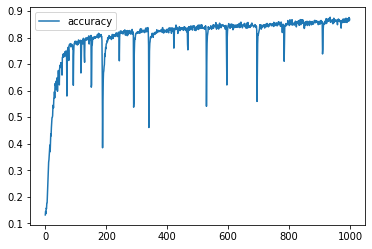

In [ ]:
# plot the accuracy of the model as it trains
plt.plot(history.history['accuracy'])
plt.legend(['accuracy'])

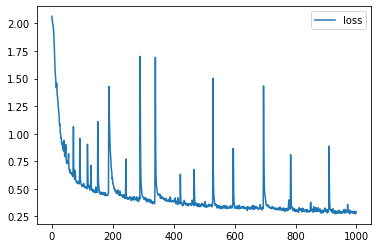

In [ ]:
# plot the loss of the model as it trains
plt.plot(history.history['loss'])
plt.legend(['loss'])

In [ ]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 1s 3ms/step - loss: 0.4700 - accuracy: 0.8560


[0.4700283706188202, 0.8560209274291992]

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([[0.0000000e+00, 0.0000000e+00, 2.3470592e-26, ..., 1.4682307e-08,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.3902498e-32,
        1.3763225e-05, 9.9998629e-01],
       [0.0000000e+00, 1.6659558e-07, 9.9999988e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.8152492e-17, ..., 3.6316308e-01,
        8.1663858e-04, 1.0126609e-25],
       [0.0000000e+00, 1.0000000e+00, 1.8604954e-21, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.6851149e-20, 2.9014432e-06, 2.7159846e-01, ..., 6.3505518e-01,
        1.2712148e-03, 5.1642071e-22]], dtype=float32)